In [1]:
from spineq.optimise import optimise, calc_location_weights
from spineq.plotting import plot_oa_weights, plot_optimisation_result

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from time import time

import os
os.getcwd()
NB_DIR = "/Users/jroberts/GitHub/spatial-inequality/notebooks"
PLOT_DIR = NB_DIR + "/../data/img/pop_workplace_weight"
os.makedirs(PLOT_DIR, exist_ok=True)

In [2]:
n_sensors = 20
theta = 500

# colour scale range
vmin = 0
vmax = 0.01

# save (and overwrite) plots?
save = False

## Total Population Only

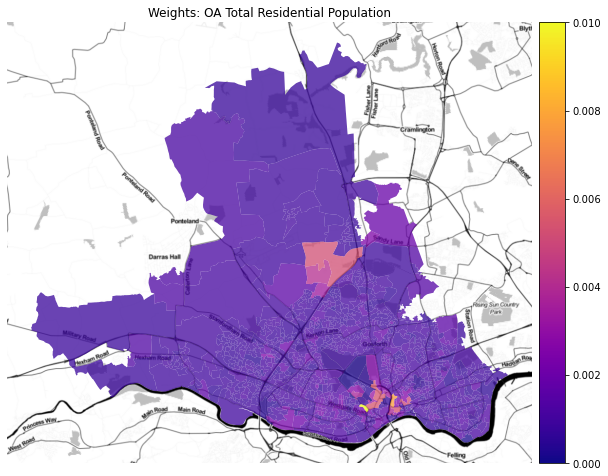

In [3]:
population_weight = 1
workplace_weight = 0
pop_age_groups = {
    "pop_total": {"min": 0, "max": 90, "weight": 1},
    "pop_children": {"min": 0, "max": 16, "weight": 0},
    "pop_elderly": {"min": 70, "max": 90, "weight": 0},
}
traffic_weight = 0

weights = calc_location_weights(
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
    traffic_weight=traffic_weight,
    combine=True,
)

if save:
    save_path = NB_DIR+"/../data/img/totalpop_weights.png"
else:
    save_path = None

plot_oa_weights(weights, title="Weights: OA Total Residential Population",
                vmin=vmin, vmax=vmax,
                save_path=save_path)

Fetching data...
Placing sensor 1 out of 20 ... coverage = 0.04
Placing sensor 2 out of 20 ... coverage = 0.08
Placing sensor 3 out of 20 ... coverage = 0.10
Placing sensor 4 out of 20 ... coverage = 0.12
Placing sensor 5 out of 20 ... coverage = 0.15
Placing sensor 6 out of 20 ... coverage = 0.17
Placing sensor 7 out of 20 ... coverage = 0.19
Placing sensor 8 out of 20 ... coverage = 0.21
Placing sensor 9 out of 20 ... coverage = 0.22
Placing sensor 10 out of 20 ... coverage = 0.23
Placing sensor 11 out of 20 ... coverage = 0.24
Placing sensor 12 out of 20 ... coverage = 0.26
Placing sensor 13 out of 20 ... coverage = 0.27
Placing sensor 14 out of 20 ... coverage = 0.28
Placing sensor 15 out of 20 ... coverage = 0.29
Placing sensor 16 out of 20 ... coverage = 0.30
Placing sensor 17 out of 20 ... coverage = 0.31
Placing sensor 18 out of 20 ... coverage = 0.32
Placing sensor 19 out of 20 ... coverage = 0.33
Placing sensor 20 out of 20 ... coverage = 0.34
Took 55.870996952056885 seconds


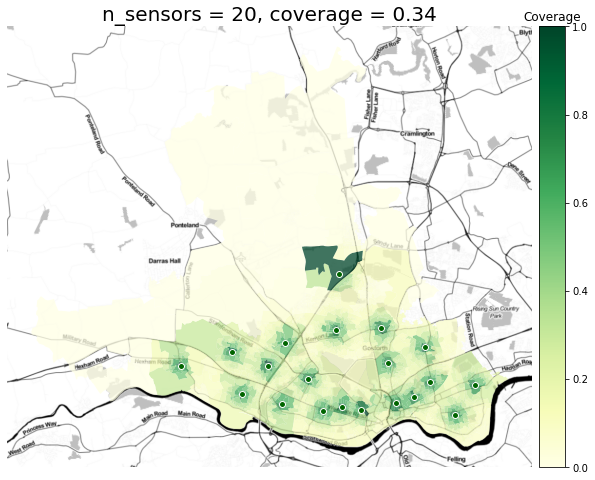

In [4]:
start_time = time()

result = optimise(n_sensors=n_sensors,
                  theta=theta,
                  population_weight=population_weight,
                  workplace_weight=workplace_weight,
                  pop_age_groups=pop_age_groups)

print("Took", time()-start_time, "seconds")

if save:
    save_path = NB_DIR+"/../data/img/totalpop_opt.png"
else:
    save_path = None

plot_optimisation_result(result, save_path=save_path)

## Place of Work Only

NB: Does using population weighted centroid make sense for workplace? Only alternative is to use OA (non-weighted) centroid. More complex for optimisation to use different locations for each one.

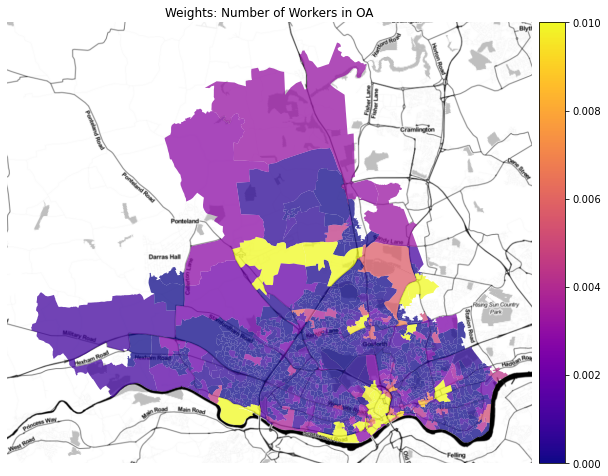

In [5]:
population_weight = 0
workplace_weight = 1
pop_age_groups = {
    "pop_total": {"min": 0, "max": 90, "weight": 1},
    "pop_children": {"min": 0, "max": 16, "weight": 0},
    "pop_elderly": {"min": 70, "max": 90, "weight": 0},
}
traffic_weight = 0

weights = calc_location_weights(
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
    traffic_weight=traffic_weight,
    combine=True,
)

if save:
    save_path = NB_DIR+"/../data/img/workplace_weights.png"
else:
    save_path = None
    
plot_oa_weights(weights, title="Weights: Number of Workers in OA",
                vmin=vmin, vmax=vmax,
                save_path=save_path)

Fetching data...
Placing sensor 1 out of 20 ... coverage = 0.16
Placing sensor 2 out of 20 ... coverage = 0.23
Placing sensor 3 out of 20 ... coverage = 0.27
Placing sensor 4 out of 20 ... coverage = 0.32
Placing sensor 5 out of 20 ... coverage = 0.36
Placing sensor 6 out of 20 ... coverage = 0.39
Placing sensor 7 out of 20 ... coverage = 0.42
Placing sensor 8 out of 20 ... coverage = 0.45
Placing sensor 9 out of 20 ... coverage = 0.47
Placing sensor 10 out of 20 ... coverage = 0.48
Placing sensor 11 out of 20 ... coverage = 0.50
Placing sensor 12 out of 20 ... coverage = 0.51
Placing sensor 13 out of 20 ... coverage = 0.53
Placing sensor 14 out of 20 ... coverage = 0.54
Placing sensor 15 out of 20 ... coverage = 0.55
Placing sensor 16 out of 20 ... coverage = 0.56
Placing sensor 17 out of 20 ... coverage = 0.57
Placing sensor 18 out of 20 ... coverage = 0.59
Placing sensor 19 out of 20 ... coverage = 0.60
Placing sensor 20 out of 20 ... coverage = 0.61


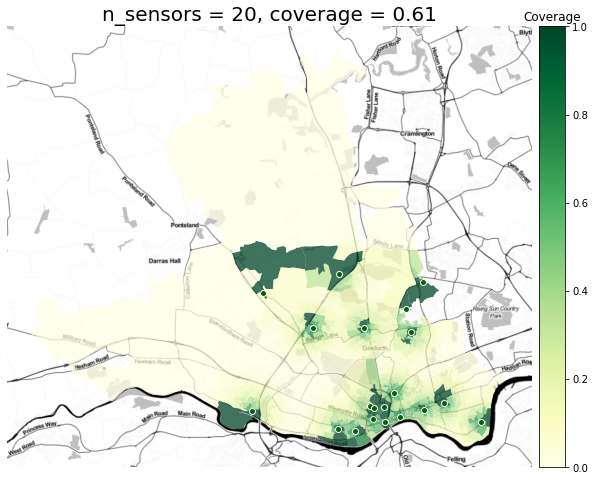

In [6]:
result = optimise(n_sensors=n_sensors,
                  theta=theta,
                  population_weight=population_weight,
                  workplace_weight=workplace_weight,
                  pop_age_groups=pop_age_groups)

if save:
    save_path = NB_DIR+"/../data/img/workplace_opt.png"
else:
    save_path = None

plot_optimisation_result(result,
                         save_path=save_path)

## Children <16 Years Old Only

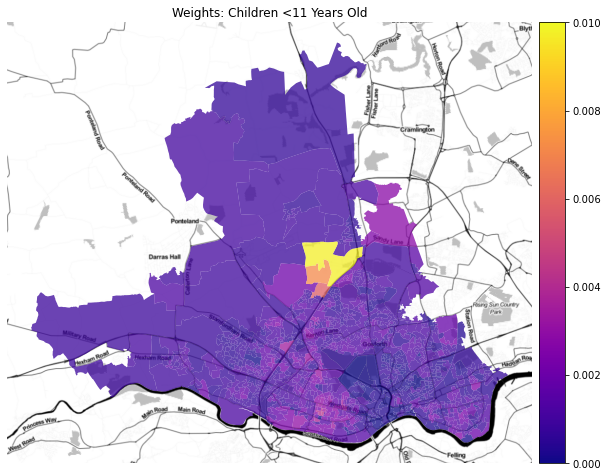

In [7]:
population_weight = 1
workplace_weight = 0
pop_age_groups = {
    "pop_total": {"min": 0, "max": 90, "weight": 0},
    "pop_children": {"min": 0, "max": 16, "weight": 1},
    "pop_elderly": {"min": 70, "max": 90, "weight": 0},
}
traffic_weight = 0

weights = calc_location_weights(
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
    traffic_weight=traffic_weight,
    combine=True,
)

if save:
    save_path = NB_DIR+"/../data/img/children_weights.png"
else:
    save_path = None
    
plot_oa_weights(weights, title="Weights: Children <11 Years Old",
                vmin=vmin, vmax=vmax,
                save_path=save_path)

Fetching data...
Placing sensor 1 out of 20 ... coverage = 0.06
Placing sensor 2 out of 20 ... coverage = 0.09
Placing sensor 3 out of 20 ... coverage = 0.11
Placing sensor 4 out of 20 ... coverage = 0.14
Placing sensor 5 out of 20 ... coverage = 0.16
Placing sensor 6 out of 20 ... coverage = 0.18
Placing sensor 7 out of 20 ... coverage = 0.20
Placing sensor 8 out of 20 ... coverage = 0.21
Placing sensor 9 out of 20 ... coverage = 0.23
Placing sensor 10 out of 20 ... coverage = 0.24
Placing sensor 11 out of 20 ... coverage = 0.26
Placing sensor 12 out of 20 ... coverage = 0.27
Placing sensor 13 out of 20 ... coverage = 0.28
Placing sensor 14 out of 20 ... coverage = 0.30
Placing sensor 15 out of 20 ... coverage = 0.31
Placing sensor 16 out of 20 ... coverage = 0.32
Placing sensor 17 out of 20 ... coverage = 0.33
Placing sensor 18 out of 20 ... coverage = 0.34
Placing sensor 19 out of 20 ... coverage = 0.35
Placing sensor 20 out of 20 ... coverage = 0.35


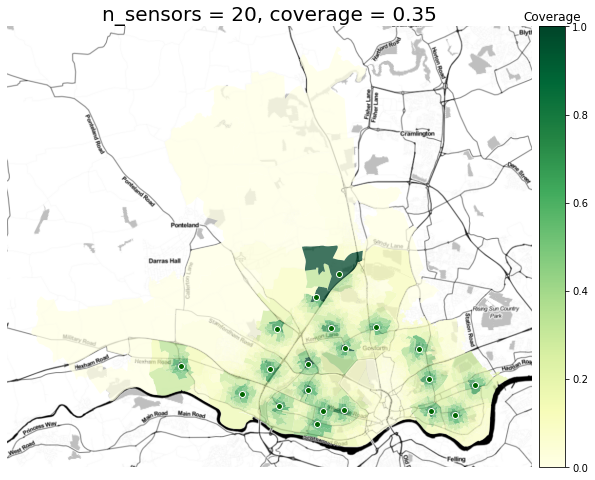

In [8]:
result = optimise(n_sensors=n_sensors,
                  theta=theta,
                  population_weight=population_weight,
                  workplace_weight=workplace_weight,
                  pop_age_groups=pop_age_groups)

if save:
    save_path = NB_DIR+"/../data/img/children_opt.png"
else:
    save_path = None

plot_optimisation_result(result,
                         save_path=save_path)

## Adults >=70 Only

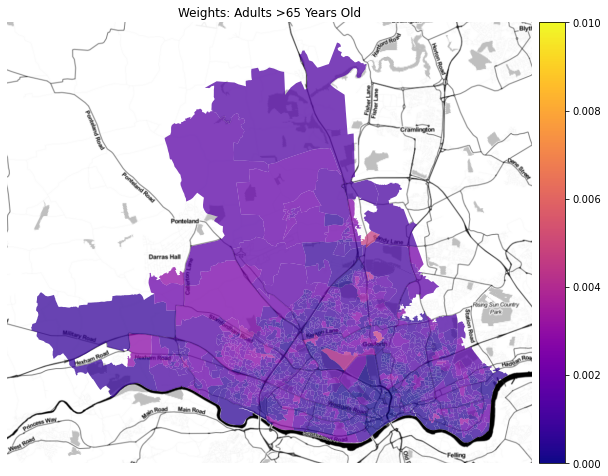

In [9]:
population_weight = 1
workplace_weight = 0
pop_age_groups = {
    "pop_total": {"min": 0, "max": 90, "weight": 0},
    "pop_children": {"min": 0, "max": 16, "weight": 0},
    "pop_elderly": {"min": 70, "max": 90, "weight": 1},
}
traffic_weight = 0

weights = calc_location_weights(
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
    traffic_weight=traffic_weight,
    combine=True,
)

if save:
    save_path = NB_DIR+"/../data/img/elderly_weights.png"
else:
    save_path = None

plot_oa_weights(weights, title="Weights: Adults >65 Years Old",
                vmin=vmin, vmax=vmax,
                save_path=save_path)

Fetching data...
Placing sensor 1 out of 20 ... coverage = 0.03
Placing sensor 2 out of 20 ... coverage = 0.06
Placing sensor 3 out of 20 ... coverage = 0.08
Placing sensor 4 out of 20 ... coverage = 0.11
Placing sensor 5 out of 20 ... coverage = 0.13
Placing sensor 6 out of 20 ... coverage = 0.15
Placing sensor 7 out of 20 ... coverage = 0.16
Placing sensor 8 out of 20 ... coverage = 0.18
Placing sensor 9 out of 20 ... coverage = 0.19
Placing sensor 10 out of 20 ... coverage = 0.21
Placing sensor 11 out of 20 ... coverage = 0.22
Placing sensor 12 out of 20 ... coverage = 0.23
Placing sensor 13 out of 20 ... coverage = 0.25
Placing sensor 14 out of 20 ... coverage = 0.26
Placing sensor 15 out of 20 ... coverage = 0.27
Placing sensor 16 out of 20 ... coverage = 0.28
Placing sensor 17 out of 20 ... coverage = 0.30
Placing sensor 18 out of 20 ... coverage = 0.31
Placing sensor 19 out of 20 ... coverage = 0.32
Placing sensor 20 out of 20 ... coverage = 0.33


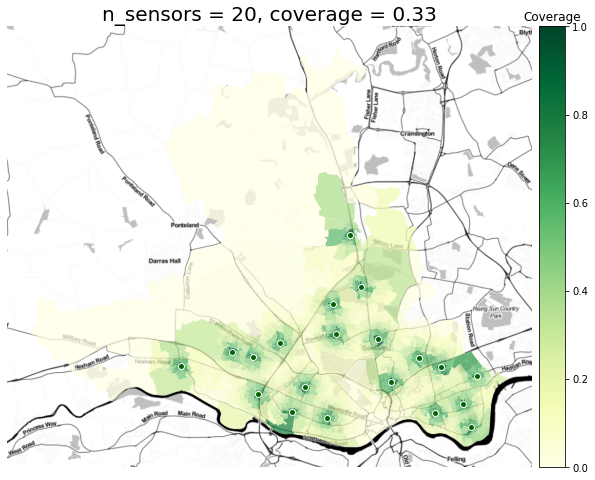

In [10]:
result = optimise(n_sensors=n_sensors,
                  theta=theta,
                  population_weight=population_weight,
                  workplace_weight=workplace_weight,
                  pop_age_groups=pop_age_groups)

if save:
    save_path = NB_DIR+"/../data/img/elderly_opt.png"
else:
    save_path = None

plot_optimisation_result(result,
                         save_path=save_path)

## Combined Weights, Varied by Age

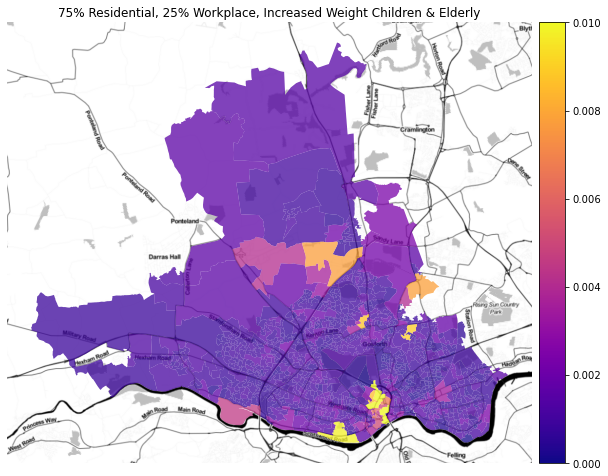

In [11]:
population_weight = 0.75
workplace_weight = 0.25
pop_age_groups = {
    "pop_total": {"min": 0, "max": 90, "weight": 1},
    "pop_children": {"min": 0, "max": 16, "weight": 3},
    "pop_elderly": {"min": 70, "max": 90, "weight": 2},
}

weights = calc_location_weights(
    population_weight=population_weight,
    workplace_weight=workplace_weight,
    pop_age_groups=pop_age_groups,
    combine=True,
)

if save:
    save_path = NB_DIR+"/../data/img/mixed_weights.png"
else:
    save_path = None


plot_oa_weights(weights, title="75% Residential, 25% Workplace, Increased Weight Children & Elderly",
                vmin=vmin, vmax=vmax,
                save_path=save_path)

Fetching data...
Placing sensor 1 out of 20 ... coverage = 0.05
Placing sensor 2 out of 20 ... coverage = 0.08
Placing sensor 3 out of 20 ... coverage = 0.11
Placing sensor 4 out of 20 ... coverage = 0.13
Placing sensor 5 out of 20 ... coverage = 0.15
Placing sensor 6 out of 20 ... coverage = 0.17
Placing sensor 7 out of 20 ... coverage = 0.19
Placing sensor 8 out of 20 ... coverage = 0.21
Placing sensor 9 out of 20 ... coverage = 0.22
Placing sensor 10 out of 20 ... coverage = 0.23
Placing sensor 11 out of 20 ... coverage = 0.25
Placing sensor 12 out of 20 ... coverage = 0.26
Placing sensor 13 out of 20 ... coverage = 0.27
Placing sensor 14 out of 20 ... coverage = 0.28
Placing sensor 15 out of 20 ... coverage = 0.29
Placing sensor 16 out of 20 ... coverage = 0.30
Placing sensor 17 out of 20 ... coverage = 0.31
Placing sensor 18 out of 20 ... coverage = 0.32
Placing sensor 19 out of 20 ... coverage = 0.33
Placing sensor 20 out of 20 ... coverage = 0.34


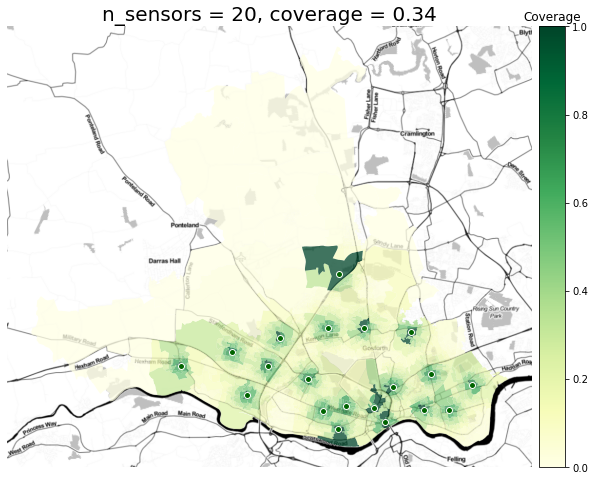

In [12]:
result = optimise(n_sensors=n_sensors,
                  theta=theta,
                  population_weight=population_weight,
                  workplace_weight=workplace_weight,
                  pop_age_groups=pop_age_groups)

if save:
    save_path = NB_DIR+"/../data/img/mixed_opt.png"
else:
    save_path = None

plot_optimisation_result(result,
                         save_path=save_path)

## Loop: Const Age Weighting, Vary Workplace vs Residential

In [13]:
if save:
    for w in np.linspace(0, 1, 11):
        print("="*50)
        print("POP WEIGHT: ", w)
        print("="*50)

        population_weight = w
        workplace_weight = 1-w
        
        pop_age_groups = {
            "pop_total": {"min": 0, "max": 90, "weight": 1},
            "pop_children": {"min": 0, "max": 16, "weight": 0},
            "pop_elderly": {"min": 70, "max": 90, "weight": 0},
        }

        title = "Weights: population={:.2f}, workplace={:.2f}".format(population_weight,
                                                                      workplace_weight)
        save_path = PLOT_DIR + "/pop_{:04d}_wplace_{:04d}".format(
                        int(1000*population_weight), int(1000*workplace_weight)
                    )

        weights = calc_location_weights(
            population_weight=population_weight,
            workplace_weight=workplace_weight,
            pop_age_groups=pop_age_groups,
            combine=True,
        )

        plot_oa_weights(weights, title=title,
                        vmin=vmin, vmax=vmax,
                        save_path=save_path + "_WEIGHTS.png")

        result = optimise(n_sensors=n_sensors,
                          theta=theta,
                          population_weight=population_weight,
                          workplace_weight=workplace_weight,
                          pop_age_groups=pop_age_groups)

        plot_optimisation_result(result,
                                 title=title  + ", coverage={:.2f}".format(result["total_coverage"]),
                                 save_path=save_path + "_SENSORS.png")

        plt.close('all')